In [2]:
import glob
import os
import yaml
from data_loader import DataLoader
from data_splitter import DataSplitter

pass1_result = "pass1_alg_fast"

splitter = DataSplitter("./data", f"{pass1_result}.yaml")
splitter.split_node_data()

./data/pass1_alg_fast_split/1626350363_282114000
./data/pass1_alg_fast_split/1626350363_584738000
./data/pass1_alg_fast_split/1626350363_685536000
./data/pass1_alg_fast_split/1626350363_786553000
./data/pass1_alg_fast_split/1626350363_887255000
./data/pass1_alg_fast_split/1626350363_988118000
./data/pass1_alg_fast_split/1626350364_88983000
./data/pass1_alg_fast_split/1626350364_189847000
./data/pass1_alg_fast_split/1626350364_290694000
./data/pass1_alg_fast_split/1626350364_391558000
./data/pass1_alg_fast_split/1626350364_492411000
./data/pass1_alg_fast_split/1626350364_593369000
./data/pass1_alg_fast_split/1626350364_694127000
./data/pass1_alg_fast_split/1626350364_795072000
./data/pass1_alg_fast_split/1626350364_895858000
./data/pass1_alg_fast_split/1626350364_996700000
./data/pass1_alg_fast_split/1626350365_97575000
./data/pass1_alg_fast_split/1626350365_198454000
./data/pass1_alg_fast_split/1626350365_299278000
./data/pass1_alg_fast_split/1626350365_400145000
./data/pass1_alg_fast_

### Accumulate data, split by timestamp and by object
You can use the DataSplitter class to split data from a YAML file containing object detection results into separate directories based on timestamps, and save each object to individual YAML files.

In [3]:
from data_loader import DataLoader
# Split the data:
loader = DataLoader("./data", "pass1_alg_fast")


accumulated_values = loader.accumulate_durations()
print(accumulated_values.keys())


dict_keys(['conveyor_classification', 'conveyor_clusterization', 'density_segmentation', 'estimation', 'normalization', 'processing', 'supports_classification', 'supports_clusterization'])


### Plot data

In [4]:
import yaml


class Durations:
    def __init__(self, node):
        self.normalization = node["normalization"]
        self.conveyor_clusterization = node["conveyor_clusterization"]
        self.conveyor_classification = node["conveyor_classification"]
        self.density_segmentation = node["density_segmentation"]
        self.supports_clusterization = node["supports_clusterization"]
        self.supports_classification = node["supports_classification"]
        self.estimation = node["estimation"]

        self.processing = node["processing"]

        self.after_normalization = self.normalization  + self.conveyor_clusterization
        self.after_conveyor_clusterization = self.after_normalization + self.conveyor_clusterization
        self.after_conveyor_classification = self.after_conveyor_clusterization + self.conveyor_classification
        self.after_density_segmentation = self.after_conveyor_classification + self.density_segmentation
        self.after_supports_clusterization = self.after_density_segmentation + self.supports_clusterization
        self.after_supports_classification = self.after_supports_clusterization + self.supports_classification
        self.after_estimation = self.after_supports_classification + self.estimation


durations_over_time = dict()
for durations_path in loader.durations_paths:
    with open(durations_path, "r", encoding="utf-8") as file:
        timestamp = durations_path.split("/")[-2]
        node = yaml.safe_load(file)
        durations_over_time[timestamp] = Durations(node)

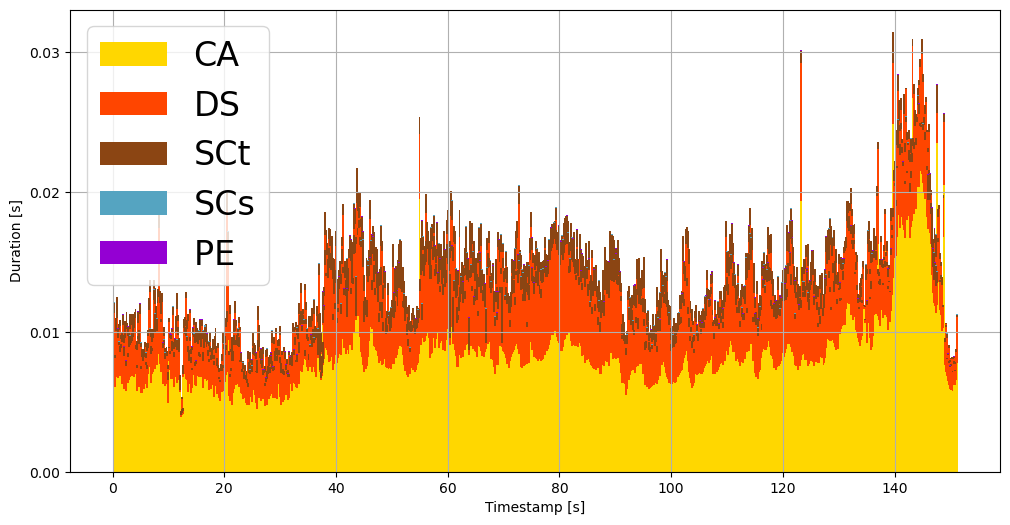

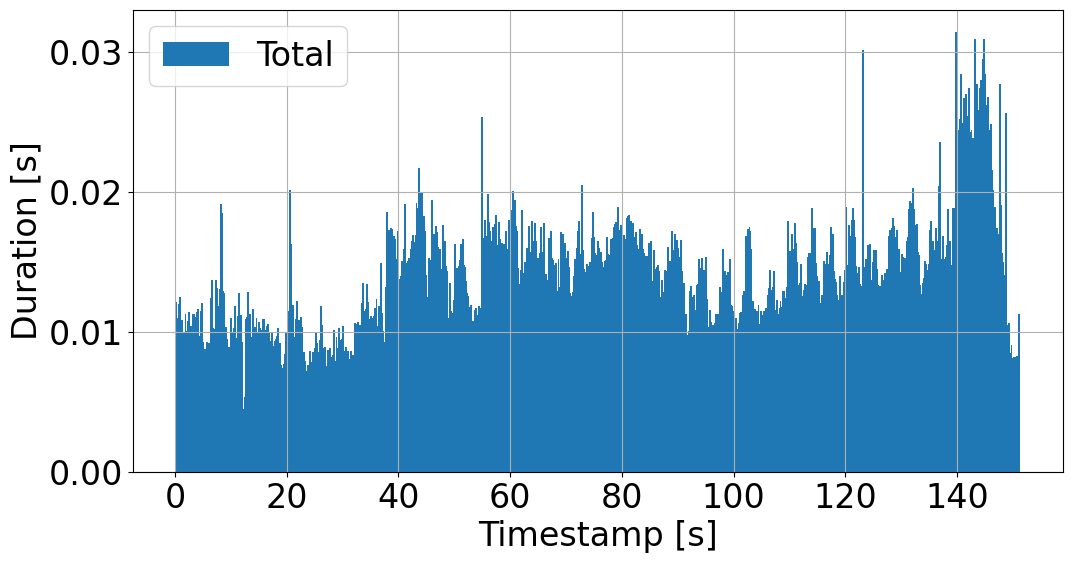

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

plt.rcParams.update({'font.size': 24})  # Ustawienie globalnie większego rozmiaru czcionki


width = 0.35


step_names = [
    "normalization",
    "conveyor_clusterization",
    "conveyor_classification",
    "density_segmentation",
    "supports_clusterization",
    "supports_classification",
    "estimation",
    "processing",
]

step_names = [
    "CA",
    "DS",
    "SCt",
    "SCs",
    "PE ",
    "Total",
]

bar_timestamps = [float(int(key.split("_")[0])) + float(int(key.split("_")[1]))*1e-9 for key in durations_over_time.keys()]

normalization_durations = []
after_normalization_times = []
conveyor_clusterization_durations = []
after_conveyor_clusterization_durations = []
conveyor_classification_durations = []
after_conveyor_classification_durations = []
density_segmentation_durations = []
after_density_segmentation_durations = []
supports_clusterization_durations = []
after_supports_clusterization_durations = []
supports_classification_durations = []
after_supports_classification_durations = []
estimation_durations = []
after_estimation_times = []

processing = []

for durations in durations_over_time.values():
    normalization_durations.append(durations.normalization)
    after_normalization_times.append(durations.after_normalization)
    conveyor_clusterization_durations.append(durations.conveyor_clusterization)
    after_conveyor_clusterization_durations.append(durations.after_conveyor_clusterization)
    conveyor_classification_durations.append(durations.conveyor_classification)
    after_conveyor_classification_durations.append(durations.after_conveyor_classification)
    density_segmentation_durations.append(durations.density_segmentation)
    after_density_segmentation_durations.append(durations.after_density_segmentation)
    supports_clusterization_durations.append(durations.supports_clusterization)
    after_supports_clusterization_durations.append(durations.after_supports_clusterization)
    supports_classification_durations.append(durations.supports_classification)
    after_supports_classification_durations.append(durations.after_supports_classification)
    estimation_durations.append(durations.estimation)
    after_estimation_times.append(durations.after_estimation)
    
    processing.append(durations.processing)

colors = [ "#FFD700", "#FF4500", "#8B4513", "#55A4C1", "#9400D3", "#000000"]

minimal = min(bar_timestamps)
bar_timestamps = [stamp - minimal for stamp in bar_timestamps]

# bar_timestamps = np.linspace(0.0, 1.0*len(timestamps_ellips)/10, num=len(timestamps_ellips))
plt.bar(
    bar_timestamps,
    normalization_durations,
    width=width,
    color="#FFD700",  # Zmieniony kolor na złoty
    label=step_names[0],
    align="edge",
)



plt.bar(
    bar_timestamps,
    density_segmentation_durations,
    width=width,
    color="#FF4500",  # Zmieniony kolor na pomarańczowy
    label=step_names[1],
    bottom=after_normalization_times,
    align="edge",
)
plt.bar(
    bar_timestamps,
    supports_clusterization_durations,
    width=width,
    color="#8B4513",  # Zmieniony kolor na brązowy
    label=step_names[2],
    bottom=after_density_segmentation_durations,
    align="edge",
)
plt.bar(
    bar_timestamps,
    supports_classification_durations,
    width=width,
    color="#55A4C1",
    label=step_names[3],
    bottom=after_supports_clusterization_durations,
    align="edge",
)
plt.bar(
    bar_timestamps,
    estimation_durations,
    width=width,
    color="#9400D3",  # Zmieniony kolor na fioletowy
    label=step_names[4],
    bottom=after_supports_classification_durations,
    align="edge",
)

plt.ylabel("Duration [s]")
plt.xlabel("Timestamp [s]")


plt.grid()
plt.legend(loc="upper left")

plt.show()

fig, ax = plt.subplots(figsize=(12, 6))
plt.bar(
    bar_timestamps,
    processing,
    width=width,
    # color="#9400D3",  # Zmieniony kolor na fioletowy
    label=step_names[5],

    align="edge",
)
plt.ylabel("Duration [s]")
plt.xlabel("Timestamp [s]")


plt.grid()
plt.legend(loc="upper left")
plt.show()

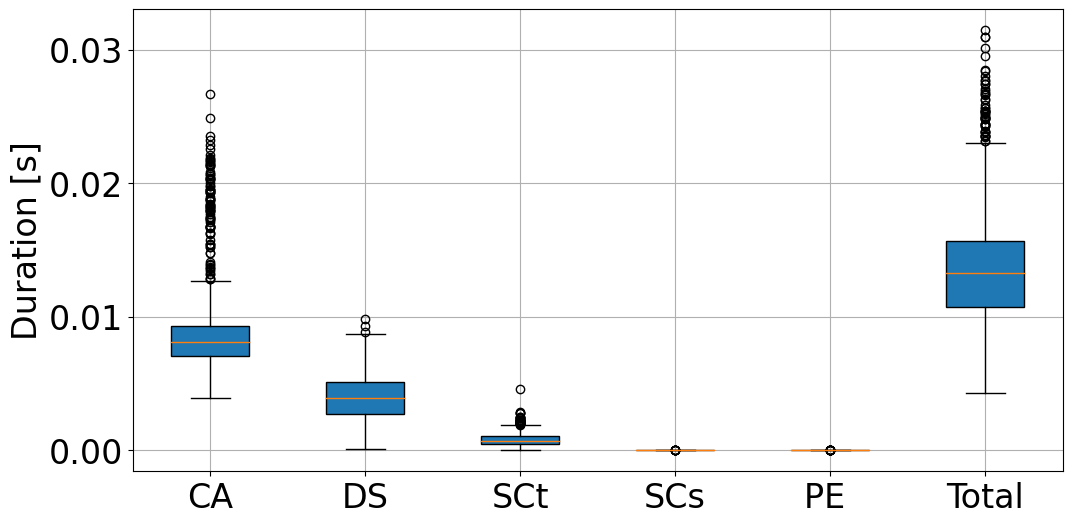

In [6]:
import numpy as np

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

plt.rcParams.update({'font.size': 24})  # Ustawienie globalnie większego rozmiaru czcionki


# Create a list of data for the boxplots
data = [
    normalization_durations,
    density_segmentation_durations,
    supports_clusterization_durations,
    supports_classification_durations,
    estimation_durations,
    processing
]

# Create the boxplots with colors
plt.boxplot(data, patch_artist=True)
# Set the x-axis tick labels
plt.xticks(np.arange(1, len(step_names)+1, 1), step_names)

# Set the y-axis label
plt.ylabel("Duration [s]")
plt.grid()

# Show the plot
plt.show()

In [7]:
for segment in data:
    print(f"Min: {min(segment)*1000.0}")
    print(f"Max: {max(segment)*1000.0}")
    print(f"stddev: {np.std(segment)*1000.0}")
    print(f"mean: {np.mean(segment)*1000.0}")

Min: 3.9050000000000002
Max: 26.689
stddev: 2.9785710851846487
mean: 8.709204545454543
Min: 0.126
Max: 9.818999999999999
stddev: 1.639107601432113
mean: 3.9585788770053476
Min: 0.020999999999999998
Max: 4.564
stddev: 0.46657775981360605
mean: 0.800764037433155
Min: 0.0
Max: 0.019
stddev: 0.002488459504690178
mean: 0.009086229946524065
Min: 0.0
Max: 0.022
stddev: 0.002864395211946828
mean: 0.00886898395721925
Min: 4.2989999999999995
Max: 31.45
stddev: 3.963020448959336
mean: 13.486502673796792
